In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
site = pd.read_csv('data/site_info.csv')
energy = pd.read_csv('data/energy.csv')
dangjin_fcst = pd.read_csv('data/add_dangjin_wind_time_insolation.csv')
ulsan_fcst = pd.read_csv('data/add_ulsan_wind_time_insolation.csv')

In [3]:
energy

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0
25628,2021-01-31 21:00:00,0.0,0.0,0,0
25629,2021-01-31 22:00:00,0.0,0.0,0,0
25630,2021-01-31 23:00:00,0.0,0.0,0,0


In [4]:
dangjin_fcst

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Wind_X,Wind_Y,Day sin,Day cos,Year sin,Year cos,declination,sunrise,sunset,altitude,Insolation
0,2018-03-02 00:00:00,-2.000000,55.000000,6.700000,336.000000,1.0,6.120755,-2.725136,-7.071068e-01,-7.071068e-01,0.858280,0.513182,-8.293705,6.993442,17.189351,0.0,0.0
1,2018-03-02 01:00:00,-2.333333,55.000000,6.133333,337.000000,1.0,5.645763,-2.396484,-8.660254e-01,-5.000000e-01,0.858648,0.512566,-8.293705,6.993442,17.189351,0.0,0.0
2,2018-03-02 02:00:00,-2.666667,55.000000,5.566667,338.000000,1.0,5.161323,-2.085310,-9.659258e-01,-2.588190e-01,0.859015,0.511951,-8.293705,6.993442,17.189351,0.0,0.0
3,2018-03-02 03:00:00,-3.000000,55.000000,5.000000,339.000000,1.0,4.667902,-1.791840,-1.000000e+00,-3.848660e-12,0.859382,0.511335,-8.293705,6.993442,17.189351,0.0,0.0
4,2018-03-02 04:00:00,-3.333333,56.666667,4.700000,343.666667,1.0,4.510317,-1.321758,-9.659258e-01,2.588190e-01,0.859748,0.510719,-8.293705,6.993442,17.189351,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,5.333333,83.333333,7.466667,20.333333,4.0,7.001396,2.594527,5.000000e-01,-8.660254e-01,0.858846,0.512234,-8.293705,6.993442,17.189351,0.0,0.0
26300,2021-03-01 20:00:00,4.666667,81.666667,7.333333,23.666667,4.0,6.716573,2.943710,2.588190e-01,-9.659258e-01,0.859213,0.511618,-8.293705,6.993442,17.189351,0.0,0.0
26301,2021-03-01 21:00:00,4.000000,80.000000,7.200000,27.000000,4.0,6.415247,3.268732,4.907520e-12,-1.000000e+00,0.859579,0.511002,-8.293705,6.993442,17.189351,0.0,0.0
26302,2021-03-01 22:00:00,4.000000,80.000000,7.200000,27.000000,4.0,6.415247,3.268732,-2.588190e-01,-9.659258e-01,0.859945,0.510386,-8.293705,6.993442,17.189351,0.0,0.0


In [5]:
site

,Id,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,0.7,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,0.5,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


In [6]:
c_floating = 1000
c_warehouse = 700
c_dangjin = 1000
c_ulsan = 500

In [7]:
model_path = 'model'
filename = []
filename.append(os.path.join(model_path, 'floating_checkpoint.h5py'))
filename.append(os.path.join(model_path, 'warehouse_checkpoint.h5py'))
filename.append(os.path.join(model_path, 'dangjin_checkpoint.h5py'))
filename.append(os.path.join(model_path, 'ulsan_checkpoint.h5py'))

In [8]:
def make_dataset(data, label, window_size=24):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [9]:
def root_mean_squared_error (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [10]:
df = pd.concat([dangjin_fcst, energy['dangjin_floating']], axis=1)
df[:24]
# df['dangjin_floating'].isnull().sum()

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Wind_X,Wind_Y,Day sin,Day cos,Year sin,Year cos,declination,sunrise,sunset,altitude,Insolation,dangjin_floating
0,2018-03-02 00:00:00,-2.000000,55.000000,6.700000,336.000000,1.000000,6.120755,-2.725136e+00,-7.071068e-01,-7.071068e-01,0.858280,0.513182,-8.293705,6.993442,17.189351,0.000000,0.000000,0.0
1,2018-03-02 01:00:00,-2.333333,55.000000,6.133333,337.000000,1.000000,5.645763,-2.396484e+00,-8.660254e-01,-5.000000e-01,0.858648,0.512566,-8.293705,6.993442,17.189351,0.000000,0.000000,0.0
2,2018-03-02 02:00:00,-2.666667,55.000000,5.566667,338.000000,1.000000,5.161323,-2.085310e+00,-9.659258e-01,-2.588190e-01,0.859015,0.511951,-8.293705,6.993442,17.189351,0.000000,0.000000,0.0
3,2018-03-02 03:00:00,-3.000000,55.000000,5.000000,339.000000,1.000000,4.667902,-1.791840e+00,-1.000000e+00,-3.848660e-12,0.859382,0.511335,-8.293705,6.993442,17.189351,0.000000,0.000000,0.0
4,2018-03-02 04:00:00,-3.333333,56.666667,4.700000,343.666667,1.000000,4.510317,-1.321758e+00,-9.659258e-01,2.588190e-01,0.859748,0.510719,-8.293705,6.993442,17.189351,0.000000,0.000000,0.0
5,2018-03-02 05:00:00,-3.666667,58.333333,4.400000,348.333333,1.000000,4.309099,-8.897573e-01,-8.660254e-01,5.000000e-01,0.860114,0.510102,-8.293705,6.993442,17.189351,0.000000,0.000000,0.0
6,2018-03-02 06:00:00,-4.000000,60.000000,4.100000,353.000000,1.000000,4.069439,-4.996643e-01,-7.071068e-01,7.071068e-01,0.860479,0.509486,-8.293705,6.993442,17.189351,0.000000,0.000000,0.0
7,2018-03-02 07:00:00,-3.333333,58.333333,3.100000,355.333333,1.000000,3.089723,-2.522119e-01,-5.000000e-01,8.660254e-01,0.860844,0.508869,-8.293705,6.993442,17.189351,6.747346,0.294918,0.0
8,2018-03-02 08:00:00,-2.666667,56.666667,2.100000,357.666667,1.000000,2.098259,-8.549750e-02,-2.588190e-01,9.659258e-01,0.861209,0.508252,-8.293705,6.993442,17.189351,17.936654,0.612442,36.0
9,2018-03-02 09:00:00,-2.000000,55.000000,1.100000,360.000000,1.000000,1.100000,-2.694223e-16,-6.412004e-12,1.000000e+00,0.861573,0.507634,-8.293705,6.993442,17.189351,28.133593,0.747167,313.0


In [11]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'Cloud', 'Wind_X', 'Wind_Y', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Insolation']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['dangjin_floating'] / c_floating
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [12]:
feature_cols = ['Temperature', 'Humidity', 'Cloud', 'Wind_X', 'Wind_Y', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Insolation']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [13]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16796, 24, 10), (4199, 24, 10), (4541, 24, 10), (672, 24, 10))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend as K

epoch = 50

In [22]:
model_0 = Sequential()
forward_layer = LSTM(24, return_sequences=False)
backward_layer = LSTM(24, activation='relu', return_sequences=False,
                   go_backwards=True)
model_0.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                     input_shape=(train_feature.shape[1], train_feature.shape[2])))
model_0.add(Dense(1, activation = 'relu'))
model_0.compile(loss='mean_squared_error', optimizer='adam')
model_0.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 48)                6720      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 49        
Total params: 6,769
Trainable params: 6,769
Non-trainable params: 0
_________________________________________________________________


In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[0], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_0 = model_0.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/50
524/525 [============================>.] - ETA: 0s - loss: 0.0082
Epoch 00001: val_loss improved from inf to 0.00580, saving model to model\floating_checkpoint.h5py
INFO:tensorflow:Assets written to: model\floating_checkpoint.h5py\assets
525/525 [==============================] - 9s 17ms/step - loss: 0.0082 - val_loss: 0.0058
Epoch 2/50
522/525 [============================>.] - ETA: 0s - loss: 0.0058
Epoch 00002: val_loss improved from 0.00580 to 0.00557, saving model to model\floating_checkpoint.h5py
INFO:tensorflow:Assets written to: model\floating_checkpoint.h5py\assets
525/525 [==============================] - 9s 18ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 3/50
524/525 [============================>.] - ETA: 0s - loss: 0.0055
Epoch 00003: val_loss did not improve from 0.00557
525/525 [==============================] - 4s 8ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 4/50
519/525 [============================>.] - ETA: 0s - loss: 0.0053
Epoch 00004: val_loss im

Epoch 33/50
525/525 [==============================] - ETA: 0s - loss: 0.0043
Epoch 00033: val_loss did not improve from 0.00432
525/525 [==============================] - 4s 7ms/step - loss: 0.0043 - val_loss: 0.0050
Epoch 34/50
524/525 [============================>.] - ETA: 0s - loss: 0.0045
Epoch 00034: val_loss did not improve from 0.00432
525/525 [==============================] - 3s 7ms/step - loss: 0.0045 - val_loss: 0.0046


In [26]:
floating_pred = model_0.predict(pred_feature)
floating_pred[48:72]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.03789349],
       [0.1106628 ],
       [0.20273644],
       [0.28902033],
       [0.34118834],
       [0.3570286 ],
       [0.33254653],
       [0.2741903 ],
       [0.18350588],
       [0.06187771],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [27]:
df = pd.concat([dangjin_fcst, energy['dangjin_warehouse']], axis=1)
df
# df['dangjin_floating'].isnull().sum()

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Wind_X,Wind_Y,Day sin,Day cos,Year sin,Year cos,declination,sunrise,sunset,altitude,Insolation,dangjin_warehouse
0,2018-03-02 00:00:00,-2.000000,55.000000,6.700000,336.000000,1.0,6.120755,-2.725136,-7.071068e-01,-7.071068e-01,0.858280,0.513182,-8.293705,6.993442,17.189351,0.0,0.0,0.0
1,2018-03-02 01:00:00,-2.333333,55.000000,6.133333,337.000000,1.0,5.645763,-2.396484,-8.660254e-01,-5.000000e-01,0.858648,0.512566,-8.293705,6.993442,17.189351,0.0,0.0,0.0
2,2018-03-02 02:00:00,-2.666667,55.000000,5.566667,338.000000,1.0,5.161323,-2.085310,-9.659258e-01,-2.588190e-01,0.859015,0.511951,-8.293705,6.993442,17.189351,0.0,0.0,0.0
3,2018-03-02 03:00:00,-3.000000,55.000000,5.000000,339.000000,1.0,4.667902,-1.791840,-1.000000e+00,-3.848660e-12,0.859382,0.511335,-8.293705,6.993442,17.189351,0.0,0.0,0.0
4,2018-03-02 04:00:00,-3.333333,56.666667,4.700000,343.666667,1.0,4.510317,-1.321758,-9.659258e-01,2.588190e-01,0.859748,0.510719,-8.293705,6.993442,17.189351,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,5.333333,83.333333,7.466667,20.333333,4.0,7.001396,2.594527,5.000000e-01,-8.660254e-01,0.858846,0.512234,-8.293705,6.993442,17.189351,0.0,0.0,NaN
26300,2021-03-01 20:00:00,4.666667,81.666667,7.333333,23.666667,4.0,6.716573,2.943710,2.588190e-01,-9.659258e-01,0.859213,0.511618,-8.293705,6.993442,17.189351,0.0,0.0,NaN
26301,2021-03-01 21:00:00,4.000000,80.000000,7.200000,27.000000,4.0,6.415247,3.268732,4.907520e-12,-1.000000e+00,0.859579,0.511002,-8.293705,6.993442,17.189351,0.0,0.0,NaN
26302,2021-03-01 22:00:00,4.000000,80.000000,7.200000,27.000000,4.0,6.415247,3.268732,-2.588190e-01,-9.659258e-01,0.859945,0.510386,-8.293705,6.993442,17.189351,0.0,0.0,NaN


In [28]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'Cloud', 'Wind_X', 'Wind_Y', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Insolation']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['dangjin_warehouse'] / c_warehouse
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [29]:
feature_cols = ['Temperature', 'Humidity', 'Cloud', 'Wind_X', 'Wind_Y', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Insolation']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [30]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16776, 24, 10), (4195, 24, 10), (4541, 24, 10), (672, 24, 10))

In [40]:
model_1 = Sequential()
forward_layer = LSTM(24, return_sequences=False)
backward_layer = LSTM(10, activation='relu', return_sequences=False,
                   go_backwards=True)
model_1.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                     input_shape=(train_feature.shape[1], train_feature.shape[2])))
model_1.add(Dense(1, activation = 'relu'))
model_1.compile(loss='mean_squared_error', optimizer='adam')
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 34)                4200      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 35        
Total params: 4,235
Trainable params: 4,235
Non-trainable params: 0
_________________________________________________________________


In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[1], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_1 = model_1.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/50
520/525 [============================>.] - ETA: 0s - loss: 0.0630
Epoch 00001: val_loss improved from inf to 0.06488, saving model to model\warehouse_checkpoint.h5py
INFO:tensorflow:Assets written to: model\warehouse_checkpoint.h5py\assets
525/525 [==============================] - 9s 17ms/step - loss: 0.0629 - val_loss: 0.0649
Epoch 2/50
523/525 [============================>.] - ETA: 0s - loss: 0.0629
Epoch 00002: val_loss did not improve from 0.06488
525/525 [==============================] - 4s 7ms/step - loss: 0.0629 - val_loss: 0.0649
Epoch 3/50
522/525 [============================>.] - ETA: 0s - loss: 0.0630
Epoch 00003: val_loss did not improve from 0.06488
525/525 [==============================] - 3s 6ms/step - loss: 0.0629 - val_loss: 0.0649
Epoch 4/50
524/525 [============================>.] - ETA: 0s - loss: 0.0629
Epoch 00004: val_loss did not improve from 0.06488
525/525 [==============================] - 3s 6ms/step - loss: 0.0629 - val_loss: 0.0649
Epoch 5/

In [42]:
warehouse_pred = model_1.predict(pred_feature)

In [43]:
warehouse_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [26]:
df = pd.concat([dangjin_fcst, energy['dangjin']], axis=1)
df
# df['dangjin_floating'].isnull().sum()

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Wind_X,Wind_Y,Day sin,Day cos,Year sin,Year cos,declination,sunrise,sunset,altitude,Insolation,dangjin
0,2018-03-02 00:00:00,-2.000000,55.000000,6.700000,336.000000,1.0,6.120755,-2.725136,-7.071068e-01,-7.071068e-01,0.858280,0.513182,-8.293705,6.993442,17.189351,0.0,0.0,0.0
1,2018-03-02 01:00:00,-2.333333,55.000000,6.133333,337.000000,1.0,5.645763,-2.396484,-8.660254e-01,-5.000000e-01,0.858648,0.512566,-8.293705,6.993442,17.189351,0.0,0.0,0.0
2,2018-03-02 02:00:00,-2.666667,55.000000,5.566667,338.000000,1.0,5.161323,-2.085310,-9.659258e-01,-2.588190e-01,0.859015,0.511951,-8.293705,6.993442,17.189351,0.0,0.0,0.0
3,2018-03-02 03:00:00,-3.000000,55.000000,5.000000,339.000000,1.0,4.667902,-1.791840,-1.000000e+00,-3.848660e-12,0.859382,0.511335,-8.293705,6.993442,17.189351,0.0,0.0,0.0
4,2018-03-02 04:00:00,-3.333333,56.666667,4.700000,343.666667,1.0,4.510317,-1.321758,-9.659258e-01,2.588190e-01,0.859748,0.510719,-8.293705,6.993442,17.189351,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,5.333333,83.333333,7.466667,20.333333,4.0,7.001396,2.594527,5.000000e-01,-8.660254e-01,0.858846,0.512234,-8.293705,6.993442,17.189351,0.0,0.0,NaN
26300,2021-03-01 20:00:00,4.666667,81.666667,7.333333,23.666667,4.0,6.716573,2.943710,2.588190e-01,-9.659258e-01,0.859213,0.511618,-8.293705,6.993442,17.189351,0.0,0.0,NaN
26301,2021-03-01 21:00:00,4.000000,80.000000,7.200000,27.000000,4.0,6.415247,3.268732,4.907520e-12,-1.000000e+00,0.859579,0.511002,-8.293705,6.993442,17.189351,0.0,0.0,NaN
26302,2021-03-01 22:00:00,4.000000,80.000000,7.200000,27.000000,4.0,6.415247,3.268732,-2.588190e-01,-9.659258e-01,0.859945,0.510386,-8.293705,6.993442,17.189351,0.0,0.0,NaN


In [27]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'Cloud', 'Wind_X', 'Wind_Y', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Insolation']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['dangjin'] / c_dangjin
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [28]:
feature_cols = ['Temperature', 'Humidity', 'Cloud', 'Wind_X', 'Wind_Y', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Insolation']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [29]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16815, 24, 10), (4204, 24, 10), (4541, 24, 10), (672, 24, 10))

In [30]:
model_2 = Sequential()
forward_layer = LSTM(24, return_sequences=False)
backward_layer = LSTM(24, activation='relu', return_sequences=False,
                   go_backwards=True)
model_2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                     input_shape=(train_feature.shape[1], train_feature.shape[2])))
model_2.add(Dense(1, activation = 'relu'))
model_2.compile(loss='mean_squared_error', optimizer='adam')
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 24)                3360      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 3,385
Trainable params: 3,385
Non-trainable params: 0
_________________________________________________________________


In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[2], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_2 = model_2.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Train on 16815 samples, validate on 4204 samples
Epoch 1/50
16736/16815 [============================>.] - ETA: 0s - loss: 0.0230
Epoch 00001: val_loss improved from inf to 0.01241, saving model to model\dangjin_checkpoint.h5
16815/16815 [==============================] - 9s 517us/sample - loss: 0.0229 - val_loss: 0.0124
Epoch 2/50
16704/16815 [============================>.] - ETA: 0s - loss: 0.0110
Epoch 00002: val_loss improved from 0.01241 to 0.01033, saving model to model\dangjin_checkpoint.h5
16815/16815 [==============================] - 8s 452us/sample - loss: 0.0111 - val_loss: 0.0103
Epoch 3/50
16800/16815 [============================>.] - ETA: 0s - loss: 0.0092
Epoch 00003: val_loss improved from 0.01033 to 0.00895, saving model to model\dangjin_checkpoint.h5
16815/16815 [==============================] - 8s 450us/sample - loss: 0.0092 - val_loss: 0.0089
Epoch 4/50
16800/16815 [============================>.] - ETA: 0s - loss: 0.0083
Epoch 00004: val_loss improved from 0.00

In [32]:
dangjin_pred = model_2.predict(pred_feature)

In [33]:
dangjin_pred

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02410757],
       [0.09644315],
       [0.1753842 ],
       [0.26592076],
       [0.34591886],
       [0.38606134],
       [0.35742748],
       [0.25359604],
       [0.0793127 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.17943409],
       [0.3572581 ],
       [0.5011775 ],
       [0.58844435],
       [0.6247495 ],
       [0.6036736 ],
       [0.51141614],
       [0.3413694 ],
       [0.13663384],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [34]:
df = pd.concat([dangjin_fcst, energy['ulsan']], axis=1)
df
# df['dangjin_floating'].isnull().sum()

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Wind_X,Wind_Y,Day sin,Day cos,Year sin,Year cos,declination,sunrise,sunset,altitude,Insolation,ulsan
0,2018-03-02 00:00:00,-2.000000,55.000000,6.700000,336.000000,1.0,6.120755,-2.725136,-7.071068e-01,-7.071068e-01,0.858280,0.513182,-8.293705,6.993442,17.189351,0.0,0.0,0.0
1,2018-03-02 01:00:00,-2.333333,55.000000,6.133333,337.000000,1.0,5.645763,-2.396484,-8.660254e-01,-5.000000e-01,0.858648,0.512566,-8.293705,6.993442,17.189351,0.0,0.0,0.0
2,2018-03-02 02:00:00,-2.666667,55.000000,5.566667,338.000000,1.0,5.161323,-2.085310,-9.659258e-01,-2.588190e-01,0.859015,0.511951,-8.293705,6.993442,17.189351,0.0,0.0,0.0
3,2018-03-02 03:00:00,-3.000000,55.000000,5.000000,339.000000,1.0,4.667902,-1.791840,-1.000000e+00,-3.848660e-12,0.859382,0.511335,-8.293705,6.993442,17.189351,0.0,0.0,0.0
4,2018-03-02 04:00:00,-3.333333,56.666667,4.700000,343.666667,1.0,4.510317,-1.321758,-9.659258e-01,2.588190e-01,0.859748,0.510719,-8.293705,6.993442,17.189351,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,5.333333,83.333333,7.466667,20.333333,4.0,7.001396,2.594527,5.000000e-01,-8.660254e-01,0.858846,0.512234,-8.293705,6.993442,17.189351,0.0,0.0,NaN
26300,2021-03-01 20:00:00,4.666667,81.666667,7.333333,23.666667,4.0,6.716573,2.943710,2.588190e-01,-9.659258e-01,0.859213,0.511618,-8.293705,6.993442,17.189351,0.0,0.0,NaN
26301,2021-03-01 21:00:00,4.000000,80.000000,7.200000,27.000000,4.0,6.415247,3.268732,4.907520e-12,-1.000000e+00,0.859579,0.511002,-8.293705,6.993442,17.189351,0.0,0.0,NaN
26302,2021-03-01 22:00:00,4.000000,80.000000,7.200000,27.000000,4.0,6.415247,3.268732,-2.588190e-01,-9.659258e-01,0.859945,0.510386,-8.293705,6.993442,17.189351,0.0,0.0,NaN


In [35]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'Cloud', 'Wind_X', 'Wind_Y', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Insolation']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['ulsan'] / c_ulsan
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [36]:
feature_cols = ['Temperature', 'Humidity', 'Cloud', 'Wind_X', 'Wind_Y', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Insolation']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [37]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16815, 24, 10), (4204, 24, 10), (4541, 24, 10), (672, 24, 10))

In [38]:
model_3 = Sequential()
forward_layer = LSTM(24, return_sequences=False)
backward_layer = LSTM(24, activation='relu', return_sequences=False,
                   go_backwards=True)
model_3.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                     input_shape=(train_feature.shape[1], train_feature.shape[2])))
model_3.add(Dense(1, activation = 'relu'))
model_3.compile(loss='mean_squared_error', optimizer='adam')
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24)                3360      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 3,385
Trainable params: 3,385
Non-trainable params: 0
_________________________________________________________________


In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[3], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_3 = model_3.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Train on 16815 samples, validate on 4204 samples
Epoch 1/50
16768/16815 [============================>.] - ETA: 0s - loss: 0.0197
Epoch 00001: val_loss improved from inf to 0.01355, saving model to model\ulsan_checkpoint.h5
16815/16815 [==============================] - 9s 510us/sample - loss: 0.0197 - val_loss: 0.0135
Epoch 2/50
16704/16815 [============================>.] - ETA: 0s - loss: 0.0115
Epoch 00002: val_loss improved from 0.01355 to 0.01011, saving model to model\ulsan_checkpoint.h5
16815/16815 [==============================] - 8s 458us/sample - loss: 0.0115 - val_loss: 0.0101
Epoch 3/50
16800/16815 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00003: val_loss improved from 0.01011 to 0.00960, saving model to model\ulsan_checkpoint.h5
16815/16815 [==============================] - 8s 456us/sample - loss: 0.0101 - val_loss: 0.0096
Epoch 4/50
16736/16815 [============================>.] - ETA: 0s - loss: 0.0095
Epoch 00004: val_loss improved from 0.00960 to

Epoch 34/50
16736/16815 [============================>.] - ETA: 0s - loss: 0.0079
Epoch 00034: val_loss did not improve from 0.00736
16815/16815 [==============================] - 7s 445us/sample - loss: 0.0079 - val_loss: 0.0075
Epoch 35/50
16768/16815 [============================>.] - ETA: 0s - loss: 0.0078
Epoch 00035: val_loss did not improve from 0.00736
16815/16815 [==============================] - 7s 445us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 36/50
16736/16815 [============================>.] - ETA: 0s - loss: 0.0078
Epoch 00036: val_loss did not improve from 0.00736
16815/16815 [==============================] - 8s 449us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 37/50
16768/16815 [============================>.] - ETA: 0s - loss: 0.0078
Epoch 00037: val_loss did not improve from 0.00736
16815/16815 [==============================] - 8s 448us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 38/50
16736/16815 [============================>.] - ETA: 0s - loss: 0.007

In [40]:
ulsan_pred = model_3.predict(pred_feature)

In [41]:
ulsan_pred

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04181939],
       [0.13615276],
       [0.23306537],
       [0.30021694],
       [0.34195158],
       [0.3447379 ],
       [0.27677688],
       [0.1512013 ],
       [0.03232982],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.09500466],
       [0.24379364],
       [0.38983986],
       [0.50042534],
       [0.5673002 ],
       [0.58610106],
       [0.54771113],
       [0.45546392],
       [0.29757395],
       [0.1189315 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [42]:
model_3.load_weights(filename[3])
pred = model_3.predict(test_feature)

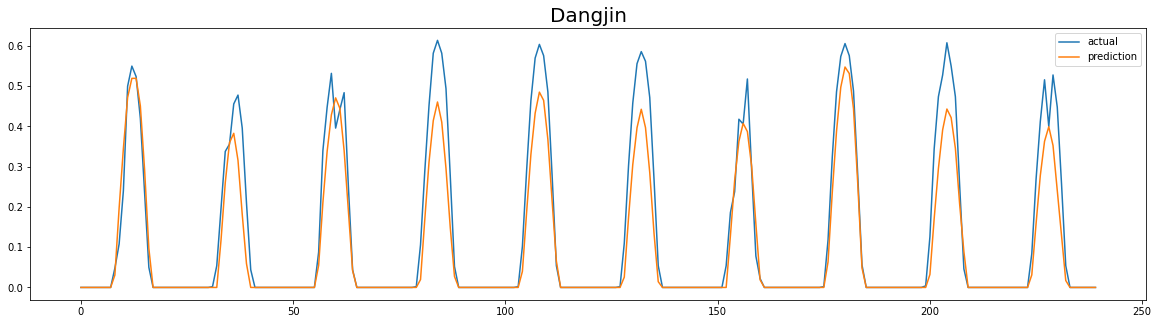

In [43]:
day = 50
day_range = 10

plt.figure(figsize=(20, 5))
plt.title('Dangjin', fontsize=20)
plt.plot(test_label[-day*24:-(day-day_range)*24], label = 'actual')
plt.plot(pred[-day*24:-(day-day_range)*24], label = 'prediction')
plt.legend()
plt.show()

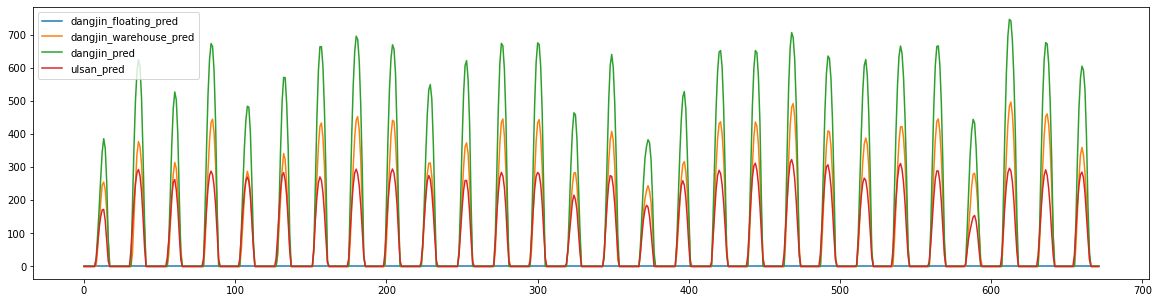

In [44]:
plt.figure(figsize=(20,5))
plt.plot(floating_pred * c_floating, label = 'dangjin_floating_pred')
plt.plot(warehouse_pred * c_warehouse, label = 'dangjin_warehouse_pred')
plt.plot(dangjin_pred * c_dangjin, label = 'dangjin_pred')
plt.plot(ulsan_pred * c_ulsan, label = 'ulsan_pred')
plt.legend()
plt.show()

In [45]:
submission = pd.read_csv('data/sample_submission.csv')

In [48]:
submission.iloc[:24*28, 1] = floating_pred * c_floating
submission.iloc[:24*28, 2] = warehouse_pred * c_warehouse
submission.iloc[:24*28, 3] = dangjin_pred * c_dangjin
submission.iloc[:24*28, 4] = ulsan_pred * c_ulsan

In [49]:
submission.to_csv('data/submission.csv', index=False)
submission.head(48)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2021-02-01 01:00:00,0.0,0.000000,0.000000,0.000000
1,2021-02-01 02:00:00,0.0,0.000000,0.000000,0.000000
2,2021-02-01 03:00:00,0.0,0.000000,0.000000,0.000000
3,2021-02-01 04:00:00,0.0,0.000000,0.000000,0.000000
4,2021-02-01 05:00:00,0.0,0.000000,0.000000,0.000000
5,2021-02-01 06:00:00,0.0,0.000000,0.000000,0.000000
6,2021-02-01 07:00:00,0.0,0.000000,0.000000,0.000000
7,2021-02-01 08:00:00,0.0,0.000000,0.000000,0.000000
8,2021-02-01 09:00:00,0.0,1.604825,24.107571,20.909697
9,2021-02-01 10:00:00,0.0,55.339550,96.443146,68.076378


In [47]:
import pandas as pd
import numpy as np

def sola_nmae(answer_df, submission_df):
    submission = submission_df[submission_df['time'].isin(answer_df['time'])]
    submission.index = range(submission.shape[0])
    
    # 시간대별 총 발전량
    sum_submission = submission.iloc[:,1:].sum(axis=1)
    sum_answer = answer_df.iloc[:,1:].sum(axis=1)
    
    # 발전소 발전용량
    capacity = {
        'dangjin_floating':1000, # 당진수상태양광 발전용량
        'dangjin_warehouse':700, # 당진자재창고태양광 발전용량
        'dangjin':1000, # 당진태양광 발전용량
        'ulsan':500 # 울산태양광 발전용량
    }
    
    # 총 발전용량
    total_capacity = np.sum(list(capacity.values()))
    
    # 총 발전용량 절대오차
    absolute_error = (sum_answer - sum_submission).abs()
    
    # 발전용량으로 정규화
    absolute_error /= total_capacity
    
    # 총 발전용량의 10% 이상 발전한 데이터 인덱스 추출
    target_idx = sum_answer[sum_answer>=total_capacity*0.1].index
    
    # NMAE(%)
    nmae = 100 * absolute_error[target_idx].mean()
    
    return nmae